In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def avg(list):
    return round(sum(list)/len(list), 2)

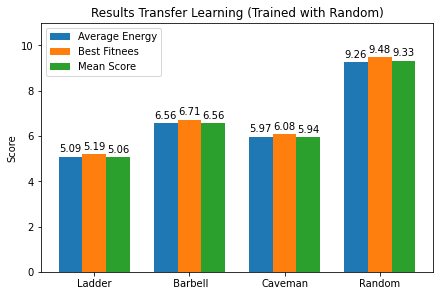

In [3]:
# Average Energy
avg_random = [9.05, 9.15, 9.27, 9.19, 9.08, 9.54, 9.19, 9.62, 9.16, 9.39]
avg_ladder = [5.06, 5.09, 4.96, 5.02, 5.21, 5.05, 5.21, 5.07, 5.02, 5.21]
avg_barbell = [6.59, 6.63, 6.51, 6.46, 6.79, 6.54, 6.64, 6.76, 6.49, 6.23]
avg_caveman = [6.14, 5.85, 5.83, 6.07, 5.75, 5.98, 6.02, 6.18, 6.11, 5.76]

# BestFitness
fit_random = [9.517000000000001, 9.491999999999999, 9.46, 9.468, 9.468000000000002, 9.486999999999998, 9.492999999999999, 9.476, 9.460999999999999, 9.5]
fit_ladder = [5.19, 5.223999999999999, 5.186000000000001, 5.178999999999999, 5.1899999999999995, 5.188, 5.194000000000001, 5.201000000000001, 5.197, 5.183]
fit_barbell = [6.696999999999999, 6.699000000000002, 6.747999999999998, 6.7010000000000005, 6.713, 6.710000000000001, 6.715, 6.6819999999999995, 6.7200000000000015, 6.709000000000001]
fit_caveman = [6.057, 6.082, 6.070999999999999, 6.07, 6.095, 6.077, 6.088, 6.063999999999999, 6.071999999999999, 6.094000000000001]

# MeanScore
sco_random = [9.329405, 9.330500000000002, 9.322285, 9.319245, 9.323275, 9.328255, 9.322759999999999, 9.32874, 9.334280000000001, 9.326130000000001 ]
sco_ladder = [5.05509, 5.052580000000001, 5.05917, 5.061825, 5.058355000000001, 5.06517, 5.05836, 5.06158, 5.052325, 5.05861]
sco_barbell = [6.5521, 6.557474999999999, 6.562374999999999, 6.55642, 6.554635000000001, 6.5589249999999995, 6.556794999999999, 6.55144, 6.55676, 6.5621350000000005]
sco_caveman = [5.94649, 5.942594999999999, 5.936005, 5.944069999999999, 5.93797, 5.940855, 5.936510000000001, 5.939735000000001, 5.937235, 5.93924]

graphs = ("Ladder", " Barbell", "Caveman", "Random")
values = {
    'Average Energy': (avg(avg_ladder), avg(avg_barbell), avg(avg_caveman), avg(avg_random)),
    'Best Fitnees': (avg(fit_ladder), avg(fit_barbell), avg(fit_caveman), avg(fit_random)),
    'Mean Score': (avg(sco_ladder), avg(sco_barbell), avg(sco_caveman), avg(sco_random))
}

x = np.arange(len(graphs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Results Transfer Learning (Trained with Random)')
ax.set_xticks(x + width, graphs)
ax.legend(loc='upper left')
ax.set_ylim(0, 11)

plt.savefig('Transfer Learning.svg', format='svg', dpi = 1200)


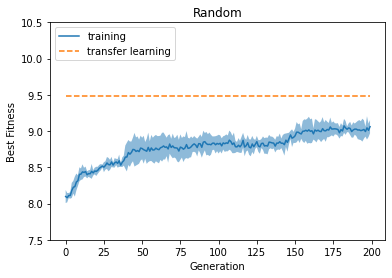

In [22]:
with open('RandomTestBestFitness.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1BestFitness.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2BestFitness.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3BestFitness.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()

fitrandomtl = []
for i in range(200):
    fitrandomtl.append(avg(fit_random))

avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(fitrandomtl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([7.5, 10.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('RandomBestFitness TL.svg', format='svg', dpi = 1200)

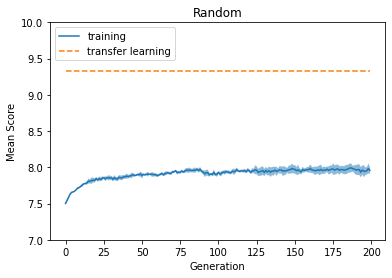

In [27]:
with open('RandomTestMeanScore.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1MeanScore.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2MeanScore.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3MeanScore.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()

scorandomtl = []
for i in range(200):
    scorandomtl.append(avg(sco_random))

avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(scorandomtl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([7.0, 10.0])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Mean Score")

plt.savefig('RandomMeanScore TL.svg', format='svg', dpi = 1200)

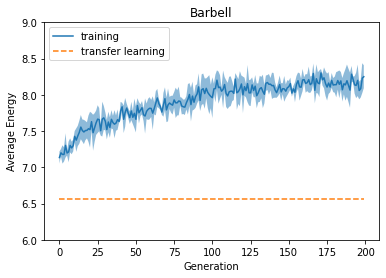

In [10]:
with open('BarbellTestAverageEnergy.csv') as barbell1: 
    energybarbell1 = barbell1.readline()

with open('BarbellTest1AverageEnergy.csv') as barbelltest1: 
    energybarbelltest1 = barbelltest1.readline()

with open('BarbellTest2AverageEnergy.csv') as barbelltest2: 
    energybarbelltest2 = barbelltest2.readline()

with open('BarbellTest3AverageEnergy.csv') as barbelltest3: 
    energybarbelltest3 = barbelltest3.readline()
    

barbelltl = []
for i in range(200):
    barbelltl.append(avg(avg_barbell))
    
avg_en1 = energybarbell1.split(',')
avg_en2 = energybarbelltest1.split(',')
avg_en3 = energybarbelltest2.split(',')
avg_en4 = energybarbelltest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(barbelltl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Barbell')
ax = plt.gca()
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.set_ylim([6, 9.0])
plt.xlabel("Generation")
plt.ylabel("Average Energy")


plt.savefig('Barbell TL.svg', format='svg', dpi = 1200)

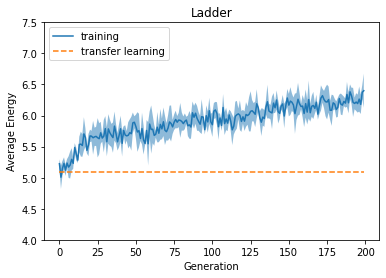

In [11]:
with open('LadderTestAverageEnergy.csv') as ladder1: 
    energyladder1 = ladder1.readline()

with open('LadderTest1AverageEnergy.csv') as laddertest1: 
    energyladdertest1 = laddertest1.readline()

with open('LadderTest2AverageEnergy.csv') as laddertest2: 
    energyladdertest2 = laddertest2.readline()

with open('LadderTest3AverageEnergy.csv') as laddertest3: 
    energyladdertest3 = laddertest3.readline()

laddertl = []
for i in range(200):
    laddertl.append(avg(avg_ladder))


avg_en1 = energyladder1.split(',')
avg_en2 = energyladdertest1.split(',')
avg_en3 = energyladdertest2.split(',')
avg_en4 = energyladdertest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(laddertl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Ladder')
ax = plt.gca()
ax.set_ylim([4.0, 7.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('Ladder TL.svg', format='svg', dpi = 1200)

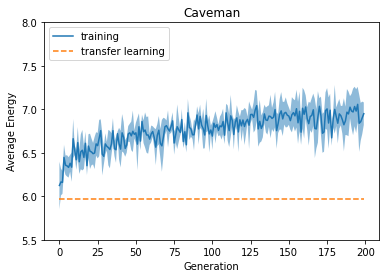

In [15]:
with open('CavemanTestAverageEnergy.csv') as caveman1: 
    energycaveman1 = caveman1.readline()

with open('Caveman1TestAverageEnergy.csv') as cavemantest1: 
    energycavemantest1 = cavemantest1.readline()

with open('Caveman2TestAverageEnergy.csv') as cavemantest2: 
    energycavemantest2 = cavemantest2.readline()

with open('Caveman3TestAverageEnergy.csv') as cavemantest3: 
    energycavemantest3 = cavemantest3.readline()

cavemantl = []
for i in range(200):
    cavemantl.append(avg(avg_caveman))

avg_en1 = energycaveman1.split(',')
avg_en2 = energycavemantest1.split(',')
avg_en3 = energycavemantest2.split(',')
avg_en4 = energycavemantest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(cavemantl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Caveman')
ax = plt.gca()
ax.set_ylim([5.5, 8.0])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('Caveman TL.svg', format='svg', dpi = 1200)

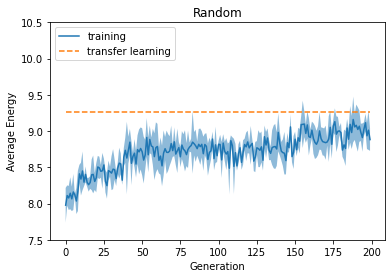

In [29]:
with open('RandomTestAverageEnergy.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1AverageEnergy.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2AverageEnergy.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3AverageEnergy.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()


randomtl = []
for i in range(200):
    randomtl.append(avg(avg_random))

avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training')
plt.plot(randomtl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([7.5, 10.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('Random TL.svg', format='svg', dpi = 1200)

30


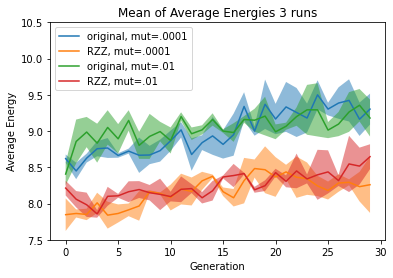

In [28]:
with open('AverageEnergyOriginal.csv') as energyfile1: 
    energy1 = energyfile1.readline()

with open('AverageEnergyOriginal1.csv') as energyfile2: 
    energy2 = energyfile2.readline()
    
with open('AverageEnergyOriginal2.csv') as energyfile3: 
    energy3 = energyfile3.readline()
    
with open('AverageEnergyRZZ.csv') as energyfileRZZ1: 
    energyRZZ1 = energyfileRZZ1.readline()

with open('AverageEnergyRZZ1.csv') as energyfileRZZ2: 
    energyRZZ2 = energyfileRZZ2.readline()
    
with open('AverageEnergyRZZ2.csv') as energyfileRZZ3: 
    energyRZZ3 = energyfileRZZ3.readline()
    
avg_en1 = energy1.split(',')
avg_en2 = energy2.split(',')
avg_en3 = energy3.split(',')
avg_enRZZ1 = energyRZZ1.split(',')
avg_enRZZ2 = energyRZZ2.split(',')
avg_enRZZ3 = energyRZZ3.split(',')

res = []
res1 = []
res2 = []
res3 = []
res4 = []
res5 = []
t = np.arange(30)

# Original mutation power = .0001
for i in range(30):
    res.append(float((avg_en1[i])))

for i in range(30):
    res1.append(float((avg_en2[i])))

for i in range(30):
    res2.append(float(avg_en3[i]))

# RZZ mutation power = .0001
for i in range(30):
    res3.append(float((avg_enRZZ1[i])))

for i in range(30):
    res4.append(float((avg_enRZZ2[i])))

for i in range(30):
    res5.append(float(avg_enRZZ3[i]))

# Original mutation power = .01

resB = []
resB1 = []
resB2 = []
resB3 = []
resB4 = []
resB5 = []

# Original mutation power = .01
for i in range(120, 150):
    resB.append(float((avg_en1[i])))

for i in range(120, 150):
    resB1.append(float((avg_en2[i])))

for i in range(120, 150):
    resB2.append(float(avg_en3[i]))

# RZZ mutation power = .01
for i in range(120, 150):
    resB3.append(float((avg_enRZZ1[i])))

for i in range(120, 150):
    resB4.append(float((avg_enRZZ2[i])))

for i in range(120, 150):
    resB5.append(float(avg_enRZZ3[i]))

print(len(res))
## calculate average
# 0.0001 
mean_avg_en_original = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i]]) / 3
    mean_avg_en_original.append(temp)

mean_avg_en_RZZ = []
for i in range(len(res3)):
    temp = sum([res3[i], res4[i], res5[i]]) / 3
    mean_avg_en_RZZ.append(temp)

std_avg_en_original = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i]])
    std_avg_en_original.append(stddev)

std_avg_en_RZZ = []
for i in range(len(res3)):
    stddev = np.std([res3[i], res4[i], res5[i]])
    std_avg_en_RZZ.append(stddev)

# 0.01
mean_avg_en_original1 = []
for i in range(len(resB)):
    temp = sum([resB[i], resB1[i], resB2[i]]) / 3
    mean_avg_en_original1.append(temp)

mean_avg_en_RZZ1 = []
for i in range(len(resB3)):
    temp = sum([resB3[i], resB4[i], resB5[i]]) / 3
    mean_avg_en_RZZ1.append(temp)

std_avg_en_original1 = []
for i in range(len(resB)):
    stddev = np.std([resB[i], resB1[i], resB2[i]])
    std_avg_en_original1.append(stddev)

std_avg_en_RZZ1 = []
for i in range(len(resB3)):
    stddev = np.std([resB3[i], resB4[i], resB5[i]])
    std_avg_en_RZZ1.append(stddev)

stdorigupper = []
stdoriglower = []

for i in range(len(std_avg_en_original)):
    temp1 = mean_avg_en_original[i] + std_avg_en_original[i]
    temp2 = mean_avg_en_original[i] - std_avg_en_original[i]
    stdorigupper.append(temp1)
    stdoriglower.append(temp2)

stdRZZupper = []
stdRZZlower = []

for i in range(len(std_avg_en_RZZ)):
    temp1 = mean_avg_en_RZZ[i] + std_avg_en_RZZ[i]
    temp2 = mean_avg_en_RZZ[i] - std_avg_en_RZZ[i]
    stdRZZupper.append(temp1)
    stdRZZlower.append(temp2)

stdorigupper1 = []
stdoriglower1 = []

for i in range(len(std_avg_en_original1)):
    temp1 = mean_avg_en_original1[i] + std_avg_en_original1[i]
    temp2 = mean_avg_en_original1[i] - std_avg_en_original1[i]
    stdorigupper1.append(temp1)
    stdoriglower1.append(temp2)

stdRZZupper1 = []
stdRZZlower1 = []

for i in range(len(std_avg_en_RZZ1)):
    temp1 = mean_avg_en_RZZ1[i] + std_avg_en_RZZ1[i]
    temp2 = mean_avg_en_RZZ1[i] - std_avg_en_RZZ1[i]
    stdRZZupper1.append(temp1)
    stdRZZlower1.append(temp2)

plt.figure()

plt.plot(mean_avg_en_original, label='original, mut=.0001')
plt.plot(mean_avg_en_RZZ, label='RZZ, mut=.0001')
plt.plot(mean_avg_en_original1, label='original, mut=.01')
plt.plot(mean_avg_en_RZZ1, label='RZZ, mut=.01')
plt.legend(loc = 'upper left')
plt.title('Mean of Average Energies 3 runs')
ax = plt.gca()
ax.fill_between(t, stdorigupper, stdoriglower, alpha = 0.5)
ax.fill_between(t, stdRZZupper, stdRZZlower, alpha = 0.5)
ax.fill_between(t, stdorigupper1, stdoriglower1, alpha = 0.5)
ax.fill_between(t, stdRZZupper1, stdRZZlower1, alpha = 0.5)
ax.set_ylim([7.5, 10.5])
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('MeanAvEnergyTest.svg', format='svg', dpi = 1200)

In [ ]:
with open('BestFitnessOriginal.csv') as fitnessfile1: 
    fitness1 = fitnessfile1.readline()

with open('BestFitnessOriginal1.csv') as fitnessfile2: 
    fitness2 = fitnessfile2.readline()
    
with open('BestFitnessOriginal2.csv') as fitnessfile3: 
    fitness3 = fitnessfile3.readline()
    
with open('BestFitnessRZZ.csv') as fitnessfileRZZ1: 
    fitnessRZZ1 = fitnessfileRZZ1.readline()

with open('BestfitnessRZZ1.csv') as fitnessfileRZZ2: 
    fitnessRZZ2 = fitnessfileRZZ2.readline()
    
with open('BestFitnessRZZ2.csv') as fitnessfileRZZ3: 
    fitnessRZZ3 = fitnessfileRZZ3.readline()
    
avg_fi1 = fitness1.split(',')
avg_fi2 = fitness2.split(',')
avg_fi3 = fitness3.split(',')
avg_fiRZZ1 = fitnessRZZ1.split(',')
avg_fiRZZ2 = fitnessRZZ2.split(',')
avg_fiRZZ3 = fitnessRZZ3.split(',')

fitres = []
fitres1 = []
fitres2 = []
fitres3 = []
fitres4 = []
fitres5 = []

# Original mutation power = .0001
for i in range(30):
    fitres.append(float((avg_fi1[i])))

for i in range(30):
    fitres1.append(float((avg_fi2[i])))

for i in range(30):
    fitres2.append(float(avg_fi3[i]))

# RZZ mutation power = .0001
for i in range(30):
    fitres3.append(float((avg_fiRZZ1[i])))

for i in range(30):
    fitres4.append(float((avg_fiRZZ2[i])))

for i in range(30):
    fitres5.append(float(avg_fiRZZ3[i]))

# Original mutation power = .01

fitresB = []
fitresB1 = []
fitresB2 = []
fitresB3 = []
fitresB4 = []
fitresB5 = []

# Original mutation power = .01
for i in range(121, 150):
    fitresB.append(float((avg_fi1[i])))

for i in range(121, 150):
    fitresB1.append(float((avg_fi2[i])))

for i in range(121, 150):
    fitresB2.append(float(avg_fi3[i]))

# RZZ mutation power = .01
for i in range(121, 150):
    fitresB3.append(float((avg_fiRZZ1[i])))

for i in range(121, 150):
    fitresB4.append(float((avg_fiRZZ2[i])))

for i in range(121, 150):
    fitresB5.append(float(avg_fiRZZ3[i]))


## calculate average
# 0.0001 
mean_avg_fi_original = []
for i in range(len(fitres)):
    temp = sum([fitres[i], fitres1[i], fitres2[i]]) / 3
    mean_avg_fi_original.append(temp)

mean_avg_fi_RZZ = []
for i in range(len(fitres3)):
    temp = sum([fitres3[i], fitres4[i], fitres5[i]]) / 3
    mean_avg_fi_RZZ.append(temp)

# 0.01
mean_avg_fi_original1 = []
for i in range(len(fitresB)):
    temp = sum([fitresB[i], fitresB1[i], fitresB2[i]]) / 3
    mean_avg_fi_original1.append(temp)

mean_avg_fi_RZZ1 = []
for i in range(len(fitresB3)):
    temp = sum([fitresB3[i], fitresB4[i], fitresB5[i]]) / 3
    mean_avg_fi_RZZ1.append(temp)

features = [i for i in range(1,7)]
plt.figure()

plt.plot(mean_avg_fi_original, label='original, mut=.0001')
plt.plot(mean_avg_fi_RZZ, label='RZZ, mut=.0001')
plt.plot(mean_avg_fi_original1, label='original, mut=.01')
plt.plot(mean_avg_fi_RZZ1, label='RZZ, mut=.01')
plt.legend()
plt.title('Mean of Best Fitness 3 runs')
ax = plt.gca()
ax.set_ylim([7.5, 10.5])
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('MeanBestFitness30g.svg', format='svg', dpi = 1200)

FileNotFoundError: [Errno 2] No such file or directory: 'BestFitnessOriginal2.csv'

In [ ]:
with open('AverageEnergy.csv') as energyfile: 
    energy = energyfile.readline()

with open('BestFitnessTest.csv') as fitnessfile:
    fitness = fitnessfile.readline()

mean_scores = energy.split(',')
best_agent_fitness = fitness.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
for i in range(10):
    res.append(float((mean_scores[i])))

for i in range(20, 30):
    res1.append(float((mean_scores[i])))

for i in range(100,110):
    res5.append(float(mean_scores[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='a=false, mut=0.0001')
plt.plot(res1, label='a=flase, mut=0.001')
plt.plot(res5, label='a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([7.5, 9.5])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('AverageEnergyOrigin.svg', format='svg', dpi = 1200)
#Gen1FalseMu0.0001run1

#mean scores
#plt.plot(generations, mean_scores[0:9], label='a=false, mut=0.0001')
#plt.plot(generations, mean_scores[20:29], label='a=false, mut=0.001')
#plt.plot(generations, mean_scores[40:49], label='a=false, mut=0.01')
#plt.plot(generations, mean_scores[60:69], label='a=0.3, mut=0.0001')
#plt.plot(generations, mean_scores[80:89], label='a=0.3, mut=0.001')
#plt.plot(generations, mean_scores[100:109], label='a=0.3, mut=0.01')
#plt.title("100 agents, 10 generations")
#plt.xlabel("generation")
#plt.ylabel("mean scores")
#plt.legend()

#plt.show()
#plt.savefig('mean_scores_100agents_10generations.png')


FileNotFoundError: [Errno 2] No such file or directory: 'AverageEnergy.csv'

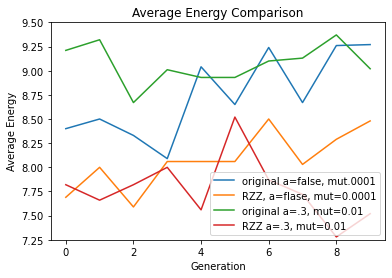

In [ ]:
with open('AverageEnergyOrigin.csv') as origin: 
    origin = origin.readline()

with open('AverageEnergyRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([7.25, 9.5])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Average Energy")
plt.title('Average Energy Comparison')

plt.savefig('CompareEnergy.svg', format='svg', dpi = 1200)

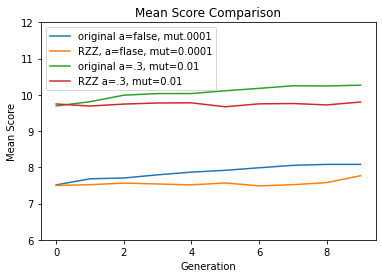

In [ ]:
with open('MeanScoreOrigin.csv') as origin: 
    origin = origin.readline()

with open('MeanScoreRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([6, 12])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Mean Score")
plt.title('Mean Score Comparison')

plt.savefig('CompareMean.svg', format='svg', dpi = 1200)

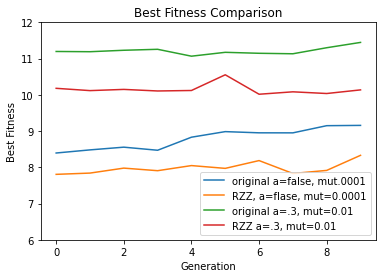

In [ ]:
with open('BestFitnessOrigin.csv') as origin: 
    origin = origin.readline()

with open('BestFitnessRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([6, 12])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title('Best Fitness Comparison')

plt.savefig('CompareBestFitness.svg', format='svg', dpi = 1200)